In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('weather.csv')

In [3]:
df

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Encoding strings to numbers

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()

In [7]:
X = np.apply_along_axis(le.fit_transform, 0, X)
y = le.fit_transform(y)

In [8]:
X

array([[2, 1, 0, 1],
       [2, 1, 0, 0],
       [0, 1, 0, 1],
       [1, 2, 0, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 0],
       [0, 0, 1, 0],
       [2, 2, 0, 1],
       [2, 0, 1, 1],
       [1, 2, 1, 1],
       [2, 2, 1, 0],
       [0, 2, 0, 0],
       [0, 1, 1, 1],
       [1, 2, 0, 0]])

### Training the model

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Predicting the result

In [11]:
classifier.predict([le.fit_transform(['overcast', 'cool', 'normal', 'weak']),
                    le.fit_transform(['rain', 'mild', 'normal', 'strong']),
                    le.fit_transform(['sunny', 'hot', 'high', 'weak'])])

array([1, 1, 0])

In [12]:
y_pred = classifier.predict(X)

### Confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [14]:
confusion_matrix(y, y_pred)

array([[5, 0],
       [0, 9]], dtype=int64)

In [15]:
accuracy_score(y, y_pred)

1.0

In [16]:
classifier.score(X, y)

1.0

### Visualising tree

In [17]:
from sklearn.tree import plot_tree

[Text(0.4444444444444444, 0.9, 'Outlook <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]\nclass = Yes'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Yes'),
 Text(0.5555555555555556, 0.7, 'Humidity <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]\nclass = No'),
 Text(0.3333333333333333, 0.5, 'Outlook <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = No'),
 Text(0.2222222222222222, 0.3, 'Windy <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No'),
 Text(0.7777777777777778, 0.5, 'Windy <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = Yes'),
 Text(0.6666666666666666, 0.3, 'Temperature <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass 

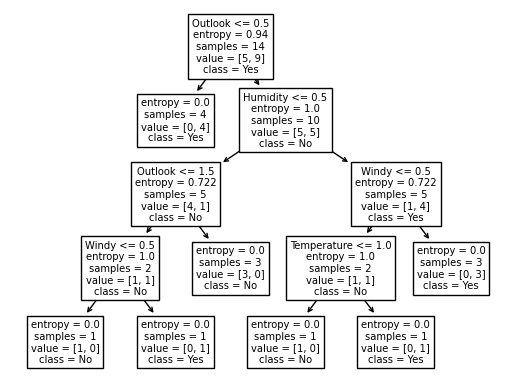

In [18]:
plot_tree(classifier, feature_names=df.columns[:-1], class_names=['No', 'Yes'])